# Step 3 — Exploratory Data Analysis (EDA)

**Goals**
- Check class balance
- Review feature distributions (histograms)
- Correlation heatmap (features vs target_bin)


In [2]:

# imports + load processed data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reload from Step 2 (or directly re-run preprocessing code here)
data = pd.read_csv("../data/cleveland.csv", header=None)
data.columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","target"
]
data = data.replace("?", np.nan)
for c in data.columns:
    data[c] = pd.to_numeric(data[c], errors="coerce")

# Minimal preprocessing to get binary target
data["target_bin"] = (data["target"] > 0).astype(int)


In [3]:
# Summary statistics
print("=== Summary Statistics ===")
print(data.describe(include='all').T.head(10))  # show first 10 rows of summary


=== Summary Statistics ===
          count        mean        std    min    25%    50%    75%    max
age       303.0   54.438944   9.038662   29.0   48.0   56.0   61.0   77.0
sex       303.0    0.679868   0.467299    0.0    0.0    1.0    1.0    1.0
cp        303.0    3.158416   0.960126    1.0    3.0    3.0    4.0    4.0
trestbps  303.0  131.689769  17.599748   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.693069  51.776918  126.0  211.0  241.0  275.0  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.990099   0.994971    0.0    0.0    1.0    2.0    2.0
thalach   303.0  149.607261  22.875003   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2


Class balance (target_bin):
0    0.541
1    0.459
Name: target_bin, dtype: float64


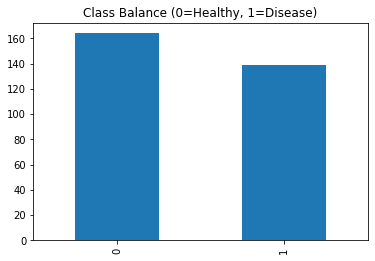

In [4]:
#class balance
print("Class balance (target_bin):")
print(data["target_bin"].value_counts(normalize=True).round(3))

data["target_bin"].value_counts().plot(kind="bar", title="Class Balance (0=Healthy, 1=Disease)")
plt.show()


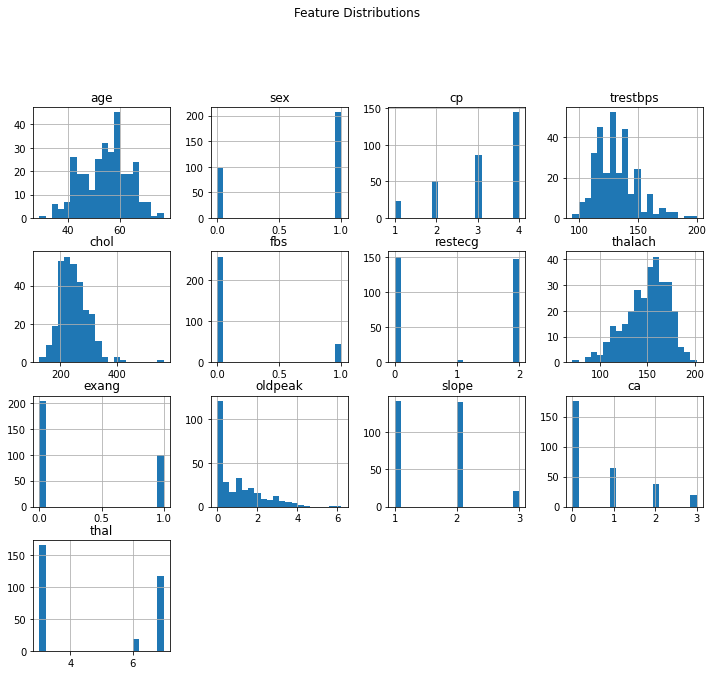

In [8]:
# correlation heatmap
data.drop(columns=["target","target_bin"]).hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.show()


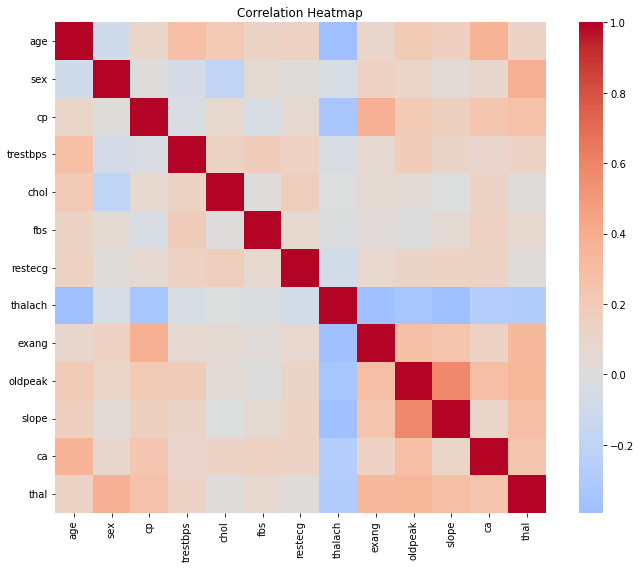

In [7]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.drop(columns=["target", "target_bin"], errors="ignore").corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
